# Riccati方程式について

* Author: 黒木玄
* Date: 2019-05-31～2019-06-03
* Repository: https://github.com/genkuroki/DifferentialEquations
$
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\eps{\varepsilon}
\newcommand\QED{\text{□}}
\newcommand\d{\partial}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\tr{\operatorname{tr}}
$

このファイルは [nbviewer](https://nbviewer.jupyter.org/github/genkuroki/DifferentialEquations/blob/master/04-1%20Riccati%20equation.ipynb) でも閲覧できる.

[Julia言語](https://julialang.org/) と [Jupyter環境](https://jupyter.org/) の簡単な解説については次を参照せよ:

* [JuliaとJupyterのすすめ](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/msfd28genkuroki.ipynb?flush_cached=true)

[Julia言語](https://julialang.org/) 環境の整備の仕方については次を参照せよ:

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

[Wolfram言語](http://www.wolfram.com/language/fast-introduction-for-programmers/ja/) 環境の整備の仕方については次を参照せよ:

* [Free Wolfram EngineをJupyterで使う方法](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/Free%20Wolfram%20Engine.ipynb)

**注意:** このノートブックの出力結果は

* https://gist.github.com/genkuroki/89466deb696fd09889f8d3aad296aef0

においてある修正を [OutputHandlingUtilities.wl の toOutText 函数](https://github.com/WolframResearch/WolframLanguageForJupyter/blob/master/WolframLanguageForJupyter/Resources/OutputHandlingUtilities.wl#L123-L136) に施した場合にのみ得られる出力である. `<pre>`～`</pre>` で囲んである部分を `$$`～`$$` で囲むように修正している.

In [1]:
TeX[expr_] := ToString[TeXForm[expr]]
JupyterOutTextForm = "TeX"
JupyterImageResolution = 88

Out[2]:
 
 
 $$TeX$$ 
 
 Out[3]:
 
 
 $$88$$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2階の線形常微分方程式について" data-toc-modified-id="2階の線形常微分方程式について-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2階の線形常微分方程式について</a></span><ul class="toc-item"><li><span><a href="#2階の線形常微分方程式の0でない解が1つ得られている場合" data-toc-modified-id="2階の線形常微分方程式の0でない解が1つ得られている場合-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>2階の線形常微分方程式の0でない解が1つ得られている場合</a></span></li><li><span><a href="#解から逆に線形常微分方程式を作れること" data-toc-modified-id="解から逆に線形常微分方程式を作れること-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>解から逆に線形常微分方程式を作れること</a></span></li></ul></li><li><span><a href="#Riccati方程式" data-toc-modified-id="Riccati方程式-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Riccati方程式</a></span><ul class="toc-item"><li><span><a href="#Riccati方程式の定義" data-toc-modified-id="Riccati方程式の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Riccati方程式の定義</a></span></li><li><span><a href="#Riccati方程式の解法の短いまとめ" data-toc-modified-id="Riccati方程式の解法の短いまとめ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Riccati方程式の解法の短いまとめ</a></span></li><li><span><a href="#Riccati方程式の数学的由来の1つが分かる補題" data-toc-modified-id="Riccati方程式の数学的由来の1つが分かる補題-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Riccati方程式の数学的由来の1つが分かる補題</a></span></li><li><span><a href="#Riccati方程式に関する基本定理" data-toc-modified-id="Riccati方程式に関する基本定理-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Riccati方程式に関する基本定理</a></span></li><li><span><a href="#Riccati方程式の解法" data-toc-modified-id="Riccati方程式の解法-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Riccati方程式の解法</a></span><ul class="toc-item"><li><span><a href="#$a=a(x)=1$-の場合のRiccati方程式の解法" data-toc-modified-id="$a=a(x)=1$-の場合のRiccati方程式の解法-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>$a=a(x)=1$ の場合のRiccati方程式の解法</a></span></li><li><span><a href="#一般の場合のRiccati方程式の解法" data-toc-modified-id="一般の場合のRiccati方程式の解法-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>一般の場合のRiccati方程式の解法</a></span></li><li><span><a href="#Riccati方程式の解が1つ分かっている場合" data-toc-modified-id="Riccati方程式の解が1つ分かっている場合-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Riccati方程式の解が1つ分かっている場合</a></span></li></ul></li><li><span><a href="#Riccati方程式に定数解が存在する場合" data-toc-modified-id="Riccati方程式に定数解が存在する場合-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Riccati方程式に定数解が存在する場合</a></span></li></ul></li></ul></div>

## 2階の線形常微分方程式について

$\d = d/dx$ とおく.

### 2階の線形常微分方程式の0でない解が1つ得られている場合

$f$ は $\psi$ に関する2階の線形常微分方程式

$$
(\d^2 + b\d + c)\psi = 0
\tag{$\#$}
$$

の $0$ でない解であると仮定する. このとき, $\psi=\phi f$ を方程式に代入すると,

$$
\begin{aligned}
0 &= 
\phi'' f + 2\phi' f' + \phi f'' + b\phi' f + b\phi f' + c\phi f 
\\ &=
\phi'' f + 2\phi' f' + b\phi' f
\end{aligned}
$$

すなわち, 

$$
\phi'' = - \left(b + \frac{2f'}{f}\right)\phi'
$$

となるので, $\phi'$ に関する1階の常微分方程式が得られる. これが満たされることと, $\phi f$ が ($\#$) の解になることは同値であり, 

$$
\phi' = \exp\left[-\int\left(b + \frac{2f'}{f}\right)\,dx\right] =
\frac{1}{f^2}e^{-\int b\,dx}
$$

と解ける. $\phi$ はこれの不定積分になり, $\phi f$ は ($\#$) の解になる.

この方法によって, 2階の線形常微分方程式の0でない解が1つ分かっている場合には, (少なくとも原理的には)もう1つの解を求めることができる.

In [4]:
Clear[a,b,c,f,p,q,u,alpha,beta,dphi,phi,psi,L,R]
dphi = (1/f[x]^2) Exp[-Integrate[b[x], x]];
dphi // TeX

$$\frac{e^{-\int b(x) \, dx}}{f(x)^2}$$

In [7]:
D[dphi, x]/dphi // Simplify // TeX

$$-b(x)-\frac{2 f'(x)}{f(x)}$$

In [8]:
g = f[x] Integrate[dphi, x];
g // TeX

$$f(x) \int \frac{e^{-\int b(x) \, dx}}{f(x)^2} \, dx$$

In [10]:
eqg = D[g,x,x] + b[x] D[g,x] + c[x] g;
Simplify[eqg] // TeX

$$\left(\int \frac{e^{-\int b(x) \, dx}}{f(x)^2} \, dx\right) \left(b(x) f'(x)+c(x) f(x)+f''(x)\right)$$

### 解から逆に線形常微分方程式を作れること

函数 $f$ は $0$ ではなく, $f$ で割れると仮定する. このとき, 

$$
\left(\d - \frac{f'}{f}\right)f = f' - \frac{f'}{f}f = 0.
$$

すなわち, $f$ を解に持つ1階の線形常微分方程式

$$
\left(\d - \frac{f'}{f}\right)\psi = 0
$$

を構成できた.

この結果は次のように2階の線形常微分方程式に拡張される. 函数 $f,g$ のWrinskian

$$
\begin{vmatrix}
f  & g  \\
f' & g' \\
\end{vmatrix}
$$

は $0$ ではなく, このWronskianで割れると仮定する. 定数 $\alpha,\beta$ に対して $\psi=\alpha f+\beta g$ とおくと, $f,g,\psi$ は一次従属なので至る所

$$
\begin{vmatrix}
f   & g   & \psi \\
f'  & g'  & \psi' \\
f'' & g'' & \psi'' \\
\end{vmatrix} = 0
$$

を満たしている. これは

$$
\begin{vmatrix}
f   & g   & \psi \\
f'  & g'  & \psi' \\
f'' & g'' & \psi'' \\
\end{vmatrix} =
\begin{vmatrix}
f'  & g'  \\
f'' & g'' \\
\end{vmatrix}
\psi -
\begin{vmatrix}
f   & g \\
f'' & g'' \\
\end{vmatrix}
\psi' +
\begin{vmatrix}
f  & g \\
f' & g' \\
\end{vmatrix}
\psi''
$$

であるから, 

$$
b = - \frac{
\begin{vmatrix}
f   & g   \\
f'' & g'' \\
\end{vmatrix}
}{
\begin{vmatrix}
f  & g  \\
f' & g' \\
\end{vmatrix}
},
\quad
c = \frac{
\begin{vmatrix}
f'  & g'  \\
f'' & g'' \\
\end{vmatrix}
}{
\begin{vmatrix}
f  & g  \\
f' & g' \\
\end{vmatrix}
}
$$

とおくと, 

$$
(\d^2 + b\d + c)\psi = 0
$$

を満たしていることを意味する. これで $f,g$ の一次結合を解に持つ2階の線形常微分方程式を構成できた.

このように, 方程式から解を得ることだけではなく, 解から方程式を作ることができる.

In [12]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
w =  Det[{{f[x], g[x]}, {f'[x], g'[x]}}] // Simplify;
b = -Det[{{f[x], g[x]}, {f''[x], g''[x]}}]/w;
c =  Det[{{f'[x], g'[x]}, {f''[x], g''[x]}}]/w;
w // TeX
b // TeX
c // TeX

Out[16]:
 
 
 $$f(x) g'(x)-g(x) f'(x)$$ 
 
 Out[17]:
 
 
 $$-\frac{f(x) g''(x)-g(x) f''(x)}{f(x) g'(x)-g(x) f'(x)}$$ 
 
 Out[18]:
 
 
 $$\frac{f'(x) g''(x)-f''(x) g'(x)}{f(x) g'(x)-g(x) f'(x)}$$

In [19]:
psi = alpha f[x] + beta g[x];
psi // TeX
D[psi,x,x] + b D[psi,x] + c psi // Simplify // TeX

Out[20]:
 
 
 $$\alpha f(x)+\beta g(x)$$ 
 
 Out[21]:
 
 
 $$0$$

## Riccati方程式

### Riccati方程式の定義

函数 $a=a(x)$, $b=b(x)$, $c=c(x)$ が与えられているとし, $a=a(x)$ で割ることができると仮定する. さらに

$$
\d = \d_x = \frac{d}{dx}
$$

とおく. $d/dx$ を $\d$ と略して書くと以下の議論が楽になる.

$u=u(x)$ に関する(非線形)常微分方程式

$$
u' + au^2 + bu + c = 0
\tag{$*$}
$$

を **Riccati方程式 (リッカティ方程式)** と呼ぶ.  $v=au$ ($u=v/a$) とおくと,

$$
\begin{aligned}
(*) & \iff
\frac{v'}{a} - \frac{a'}{a^2}v + \frac{1}{a}v^2 + \frac{b}{a}v + c = 0
\\ & \iff
v' + v^2 + \left(b - \frac{a'}{a}\right)v + ac = 0.
\end{aligned}
$$

ゆえに, 一般的なRiccati方程式($*$)の解くことは, $a=a(x)=1$ の場合のRiccati方程式

$$
u' + u^2 + bu + c = 0.
\tag{$*'$}
$$

を解くことに帰着できる.

In [22]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
u = v[x]/a[x];
u // TeX
a[x] (D[u,x] + a[x] u^2 + b[x] u + c[x]) // Simplify // TeX

Out[24]:
 
 
 $$\frac{v(x)}{a(x)}$$ 
 
 Out[25]:
 
 
 $$-\frac{v(x) a'(x)}{a(x)}+a(x) c(x)+b(x) v(x)+v'(x)+v(x)^2$$

### Riccati方程式の解法の短いまとめ

Riccati方程式を単に解きたいだけの人は以下を知っているだけで十分である.

Riccati方程式

$$
u' + au^2 + bu + c = 0
\tag{$*$}
$$

は

$$
u = \frac{1}{a}\frac{\psi'}{\psi}
$$

とおけば2階の線形常微分方程式

$$
\left(\d^2+\left(b-\frac{a'}{a}\right)+ac\right)\psi = 0
\tag{$\#$}
$$

に帰着する. このことは以下のような計算で確認できる.  

Riccati方程式 ($*$) の左辺に $u=(1/a)\psi'/\psi$ を代入すると,

$$
\begin{aligned}
&
u' = -\frac{a'}{a^2}\frac{\psi'}{\psi} + \frac{1}{a}\frac{\psi''}{\psi} - \frac{1}{a}\frac{(\psi')^2}{\psi^2} =
\frac{-(a'/a)\psi + \psi''}{a\psi} - au^2
\\ &
u' + au^2 + bu + c =
\frac{-(a'/a)\psi + \psi'' + b\psi' + ac\psi}{a\psi} =
\frac{1}{a\psi}\left(\d^2 + \left(b-\frac{a'}{a}\right)+ac\right)\psi.
\end{aligned}
$$

これより, 2階の線形常微分方程式 ($\#$) の $0$ でない解 $\psi$ に対して, $u=(1/a)\psi'/\psi$ がRiccati方程式 ($*$) の解になっていることがわかる.

逆に $u=(1/a)\psi'/\psi$ を満たす $\psi$ を

$$
\psi = e^{\int au\,dx}
$$

と構成して, 2階の線形常微分方程式 ($\#$) の左辺に代入すると, 

$$
\begin{aligned}
&
\psi' = au\psi,
\\ &
\psi'' = (a'u + au' + a^2u^2)\psi,
\\ &
\left(\d^2 + \left(b-\frac{a'}{a}\right)+ac\right)\psi =
\left(a'u + au' + a^2u^2 + \left(b-\frac{a'}{a}\right)au + ac\right)\psi =
a\psi(u'+au^2+bu+c).
\end{aligned}
$$

これより, Riccati方程式 ($*$) の解に対して, $u=(1/a)\psi'/\psi$ を満たす $0$ でない $\psi$ は2階の線形常微分方程式 ($\#$) の解になっていることがわかる.

**例:** 定数 $\kappa\ne \lambda$ が定める(特殊な)Riccati方程式

$$
u' + (u-\kappa)(u-\lambda) = 0
$$

は定数解 $u=\kappa,\lambda$ を持つ. $u=\psi'/\psi$ とおくと, このRiccati方程式は定数係数の2解の線形常微分方程式

$$
(\d^2-(\kappa+\lambda)\d+\kappa\lambda)\psi = (\d-\kappa)(\d-\lambda)\psi = 0
$$

に帰着する. これの $0$ でない解は

$$
\psi = \alpha e^{\kappa x} + \beta e^{\lambda x}, \quad (\alpha,\beta)\ne(0,0)
$$

と書け, 対応するRiccati方程式の解は

$$
u = \frac{\psi'}{\psi} = \frac{\alpha\kappa e^{\kappa x} + \beta\lambda e^{\lambda x}}{\alpha e^{\kappa x} + \beta e^{\lambda x}}
$$

と書ける. $\QED$

In [26]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,kappa,lambda,dphi,phi,psi,L,R]
R = u'[x] + (u[x] - kappa)(u[x] - lambda);
R // TeX

$$(u(x)-\kappa ) (u(x)-\lambda )+u'(x)$$

In [29]:
sol = DSolve[R == 0, u[x], x] // TeX

$$\left\{\left\{u(x)\to \frac{\lambda e^{c_1 \kappa +\lambda x}-\kappa e^{c_1 \lambda +\kappa x}}{e^{c_1 \kappa +\lambda x}-e^{c_1 \lambda +\kappa x}}\right\}\right\}$$

In [30]:
L = psi''[x] - (kappa+lambda) psi'[x] + kappa lambda psi[x];
L // TeX

$$-(\kappa +\lambda ) \psi '(x)+\kappa \lambda \psi (x)+\psi ''(x)$$

In [32]:
lsol = DSolve[L == 0, psi[x], x] // TeX

$$\left\{\left\{\psi (x)\to c_2 e^{\kappa x}+c_1 e^{\lambda x}\right\}\right\}$$

**問題:** Riccati方程式

$$
u'+ (u-\kappa)^2 = 0
$$

を解け.

**解答例:** $u = \psi'/\psi = (\log\psi)'$ とおくと, $(\d-\kappa)^2\psi=0$ に帰着する. $(\d-\kappa)^2\psi=0$ の $0$ でない解は

$$
\psi = (\alpha + \beta x)e^{\kappa x}, \quad (\alpha,\beta)\ne(0,0)
$$

と書けるので, Riccati方程式の解は

$$
u = (\log\psi)' = \frac{\beta}{\alpha+\beta x} + \kappa
$$

と書ける. $\QED$

In [33]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,kappa,lambda,dphi,phi,psi,L,R]
R = u'[x] + (u[x] - kappa)^2;
R // TeX

$$(u(x)-\kappa )^2+u'(x)$$

In [36]:
sol = DSolve[R == 0, u[x], x] // TeX

$$\left\{\left\{u(x)\to \frac{-c_1 \kappa +\kappa x+1}{x-c_1}\right\}\right\}$$

In [37]:
L = psi''[x] - 2 kappa psi'[x] + kappa^2 psi[x];
L // TeX

$$\kappa ^2 \psi (x)-2 \kappa \psi '(x)+\psi ''(x)$$

In [39]:
lsol = DSolve[L == 0, psi[x], x] // TeX

$$\left\{\left\{\psi (x)\to c_1 e^{\kappa x}+c_2 x e^{\kappa x}\right\}\right\}$$

**問題:** 定数 $\kappa\ne\lambda$ に対する次のRiccati方程式を解け:

$$
u' + \frac{1}{x}(u-\kappa)(u-\lambda).
$$

**解答例:** $u = x\psi'/\psi$ とおくと, 

$$
\left(\d^2+\left(-\frac{\kappa+\lambda}{x}+\frac{1}{x}\right)\d+\frac{1}{x}\frac{\kappa\lambda}{x}\right)\psi = 
\left(\d^2-\frac{\kappa+\lambda-1}{x}\d+\frac{\kappa\lambda}{x^2}\right)\psi = 0
$$

に帰着する. 

$$
\d^2-\frac{\kappa+\lambda-1}{x}\d+\frac{\kappa\lambda}{x^2} =
\left(\d - \frac{\kappa-1}{x}\right)\left(\d - \frac{\lambda}{x}\right) =
\left(\d - \frac{\lambda-1}{x}\right)\left(\d - \frac{\kappa}{x}\right)
$$

なので, $\psi$ に関する階の線形常微分方程式は $(\d-\kappa/x)\psi=0$ と $(\d-\lambda/x)\psi=0$ の解 $\psi=x^　＄￥\kappa,x^\lambda$ を持つ. $\kappa\ne \lambda$ という仮定より, それらは一次独立なので, $\psi$ に関する階の線形常微分方程式の $0$ でない解は

$$
\psi = \alpha x^\kappa + \beta x^\lambda, \quad (\alpha,\beta)\ne(0,0)
$$

と表され, 対応するRiccati方程式の解は

$$
u = x\frac{\psi'}{\psi} = \frac{\alpha\kappa x^\kappa + \beta\lambda x^\lambda}{\alpha x^\kappa + \beta x^\lambda}
$$

と表わされる. $\QED$

In [40]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,kappa,lambda,dphi,phi,psi,L,R]
R = u'[x] + 1/x (u[x] - kappa)(u[x] - lambda);
R // TeX

$$\frac{(u(x)-\kappa ) (u(x)-\lambda )}{x}+u'(x)$$

In [43]:
sol = DSolve[R == 0, u[x], x] // TeX

$$\left\{\left\{u(x)\to \frac{\kappa e^{c_1 \lambda } x^{\kappa }-\lambda e^{c_1 \kappa } x^{\lambda }}{e^{c_1 \lambda } x^{\kappa }-e^{c_1 \kappa } x^{\lambda }}\right\}\right\}$$

In [44]:
L = psi''[x] - (kappa+lambda-1)/x psi'[x] + kappa lambda/x^2 psi[x];
L // TeX

$$-\frac{(\kappa +\lambda -1) \psi '(x)}{x}+\frac{\kappa \lambda \psi (x)}{x^2}+\psi ''(x)$$

In [46]:
lsol = DSolve[L == 0, psi[x], x] // TeX

$$\left\{\left\{\psi (x)\to c_1 x^{\kappa }+c_2 x^{\lambda }\right\}\right\}$$

**問題:** 定数 $\kappa$ に対する次のRiccati方程式を解け:

$$
u'+\frac{1}{x}(u-\kappa)^2 = 0.
$$

**解答例:** $u=x\psi'/\psi = x(\log\psi)'$ とおくと, 

$$
\left(\d^2-\frac{2\kappa-1}{x}\d+\frac{\kappa^2}{x^2}\right)\psi = 0
$$

に帰着する. この2階の線形常微分方程式の $0$ でない解は

$$
\psi = x^\kappa(\alpha + \beta\log x)
\quad (\alpha,\beta)\ne(0,0)
$$

と書けるので, 対応するRiccati方程式の解は

$$
u = x(\log\psi)' = \kappa + \frac{\beta}{\alpha + \beta\log x}
$$

と書ける. $\QED$

In [47]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,kappa,lambda,dphi,phi,psi,L,R]
R = u'[x] + 1/x (u[x] - kappa)^2;
R // TeX

$$\frac{(u(x)-\kappa )^2}{x}+u'(x)$$

In [50]:
sol = DSolve[R == 0, u[x], x] // TeX

$$\left\{\left\{u(x)\to \frac{c_1 \kappa -\kappa \log (x)-1}{c_1-\log (x)}\right\}\right\}$$

In [51]:
L = psi''[x] - (2kappa-1)/x psi'[x] + kappa^2/x^2 psi[x];
L // TeX

$$\frac{\kappa ^2 \psi (x)}{x^2}-\frac{(2 \kappa -1) \psi '(x)}{x}+\psi ''(x)$$

In [53]:
lsol = DSolve[L == 0, psi[x], x] // TeX

$$\left\{\left\{\psi (x)\to c_1 x^{\kappa }+c_2 \kappa x^{\kappa } \log (x)\right\}\right\}$$

以下では, $u=(1/a)\psi'/\psi$ という「処方箋」の背景について調べて行く.  

### Riccati方程式の数学的由来の1つが分かる補題

$a=a(x)=1$ の場合のRiccati方程式

$$
u' + u^2 + bu + c = 0.
\tag{$*'$}
$$

の数学的な由来の1つは次の補題およびその証明を見れば分かる.

**補題:** 微分作用素 $\d^2+b\d+c$ が微分作用素 $\d-u$ で右から割り切れることとRiccati方程式($*'$)が成立することは同値である.

**証明:** $\d^2+b\d+c$ を $\d-u$ で左から割ったときの余りを求めよう. 多項式の商と余りを求める割り算と同様にして以下が成立することを示せる:

$$
\d^2+b\d+c = (\d+u+b)(\d-u) + u'+u^2+bu+c.
\tag{1}
$$

これが成立することは, 微分作用素として $\d f=f\d + f'$ が成立することを使えば, 直接的に以下のようにして確認できる.

$$
\begin{aligned}
(\d+u+b))(\d-u) &= 
\d^2 -u\d -u' + (u+b)\d -(u^2+bu)
\\ &=
\d^2+b\d -(u'+u^2+bu)
\\ &=
\d^2+b\d+c -(u'+u^2+bu+c).
\end{aligned}
$$

これより, (1)が成立することがわかる. (1)より, $\d^2+b\d+c$ が $\d-u$ で右から割り切れるための必要十分条件は($*'$) $u'+u^2+bu+c=0$ が成立することだとわかる. $\QED$

**注意:** 常微分作用素を常微分作用素で右から割った商と余りを求める割算の筆算とは以下のような計算のことである:

$$
\require{enclose}
\begin{aligned}
&
\begin{array}{rlll}
\text{R}\backslash\text{L}\!\!\!\!\!\!\!\! & \;\;\,\d\,\phantom{+u+b} \\[-2pt]
\d-u \!\!\!\!\! & \enclose{longdiv}{\d^2+b\d+c\quad\quad\quad\;\,}\kern-.3ex \\[-2pt]
     & \;\;\d^2-u\d-u'\quad\quad\;\;\;\, \\[-2pt]
     & \;\phantom{(u+b)\d+u'+c} \\[-2pt]
     & \;\phantom{\underline{\;(u+b)\d-(u^2+bu)\;}} \\[-2pt]
%     & \;\;\quad\;\phantom{u'+u^2+bu+c}\\
\end{array}
\longrightarrow
\begin{array}{rlll}
\text{R}\backslash\text{L}\!\!\!\!\!\!\!\! & \;\;\,\d\,\phantom{+u+b} \\[-2pt]
\d-u \!\!\!\!\! & \enclose{longdiv}{\d^2+b\d+c\quad\quad\quad\;\,}\kern-.3ex \\[-2pt]
     & \;\underline{\;\d^2-u\d-u'\quad\quad\;\;\;\,} \\[-2pt]
     & \;(u+b)\d+u'+c \\[-2pt]
     & \;\phantom{\underline{\;(u+b)\d-(u^2+bu)\;}} \\[-2pt]
%     & \;\;\quad\;\phantom{u'+u^2+bu+c}\\
\end{array}
\\ \longrightarrow &
\begin{array}{rlll}
\text{R}\backslash\text{L}\!\!\!\!\!\!\!\! & \;\;\,\d\,+u+b \\[-2pt]
\d-u \!\!\!\!\! & \enclose{longdiv}{\d^2+b\d+c\quad\quad\quad\;\,}\kern-.3ex \\[-2pt]
     & \;\underline{\;\d^2-u\d-u'\quad\quad\;\;\;\,} \\[-2pt]
     & \;\;(u+b)\d+u'+c \\[-2pt]
     & \;\;(u+b)\d-(u^2+bu)\; \\[-2pt]
     & \;\;\quad\;\phantom{u'+u^2+bu+c}\\
\end{array}
\longrightarrow
\begin{array}{rlll}
\text{R}\backslash\text{L}\!\!\!\!\!\!\!\! & \;\;\,\d\,+u+b \\[-2pt]
\d-u \!\!\!\!\! & \enclose{longdiv}{\d^2+b\d+c\quad\quad\quad\;\,}\kern-.3ex \\[-2pt]
     & \;\underline{\;\d^2-u\d+u'\quad\quad\;\;\;\,} \\[-2pt]
     & \;\;(u+b)\d+u'+c \\[-2pt]
     & \;\underline{\;(u+b)\d-(u^2+bu)\;} \\[-2pt]
     & \;\;\quad\;u'+u^2+bu+c\\
\end{array}
\end{aligned}
$$

$R\backslash L$ は $L$ の側を $R$ の側に左からかけることを意味している. 最初の段階では $\d u=u\d+u'$ を用いて

$$
\d(\d-u)=\d^2-u\d-u'
$$

と計算した. それ以後も同様である. $\QED$

In [54]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
Qpsi = D[psi[x],x] - u[x] psi[x];
Qpsi // TeX
PQpsi = D[Qpsi,x] + (u[x]+b[x])*Qpsi // ExpandAll;
PQpsi // TeX
R = u'[x] + u[x]^2 + b[x]u[x] + c[x];
R // TeX
PQpsi + R psi[x] // Simplify // TeX

Out[56]:
 
 
 $$\psi '(x)-\psi (x) u(x)$$ 
 
 Out[58]:
 
 
 $$b(x) \psi '(x)-b(x) \psi (x) u(x)+\psi ''(x)-\psi (x) u'(x)-\psi (x) u(x)^2$$ 
 
 Out[60]:
 
 
 $$b(x) u(x)+c(x)+u'(x)+u(x)^2$$ 
 
 Out[61]:
 
 
 $$b(x) \psi '(x)+c(x) \psi (x)+\psi ''(x)$$

### Riccati方程式に関する基本定理

**定理:** Riccati方程式 ($*'$) $u'+u^2+bu+c=0$ のすべての解 $u$ は線形常微分方程式 $(\d^2+b\d+c)f = 0$ の $0$ でない解 $f$ を用いて $u=f'/f$ と表わされ, 線形常微分方程式 $(\d^2+b\d+c)f = 0$ の $0$ でない任意の解 $f$ に対して $u=f'/f$ とおくと $u$ はRiccati方程式 ($*'$) $u'+u^2+bu+c=0$ の解になる.

**証明:** $u$ はRiccati方程式 ($*'$) $u'+u^2+bu+c=0$ の解であると仮定する. このとき, 「Riccati方程式の数学的由来の1つが分かる補題」より, 

$$
\d^2+b\d+c = (\d+u+b)(\d-u)
$$

が成立しているので, 微分方程式 $(\d-u)f=0$ の $0$ でない解 $f$ を取れば, $u=f'/f$ でかつ $(\d^2+b\d+c)f=0$ が成立する.

$f$ は線形常微分方程式 $(\d^2+b\d+c)f=0$ の $0$ でない解であるとし, $u=f'/f$ とおく.  このとき, $f$ は $(\d-u)f=0$ を満たしている.  $\d-u$ で右から $P = \d^2+b\d+c$ を割って商 $Q$ と余り $R$ ($R$ は $0$ 階の常微分作用素, すなわち函数)を求められる.

$$
P = Q(\d-u)+R.
$$

$Pf=0$, $(\d-u)f=0$ より $Rf=0$ すなわち $R=0$ が得られる. 「Riccati方程式の数学的由来の1つが分かる補題」の証明より, $R=u'+u^2+bu+c$ なので, $u$ がRiccati方程式($*'$) $u'+u^2+bu+c=0$ を満たしていることがわかった. $\QED$

In [62]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
u = f'[x]/f[x];
u // TeX
R = D[u,x]+u^2+b[x] u+c[x];
R // Factor // TeX

Out[64]:
 
 
 $$\frac{f'(x)}{f(x)}$$ 
 
 Out[66]:
 
 
 $$\frac{b(x) f'(x)+c(x) f(x)+f''(x)}{f(x)}$$

### Riccati方程式の解法

#### $a=a(x)=1$ の場合のRiccati方程式の解法

Riccati方程式に関する基本定理より, Riccati方程式

$$
u'+u^2+bu+c=0
\tag{$*'$}
$$

を解くためには(すなわちすべての解を求めるためには), $\psi$ に関する線形常微分方程式

$$
(\d^2+b\d+c)\psi = 0
$$

の $0$ でない解 $\psi=f$ に対する $u=f'/f$ を求めればよい.


#### 一般の場合のRiccati方程式の解法

一般のRiccati方程式 ($*$)

$$
u'+au^2+bu+c=0
\tag{$*$}
$$

を解くためには, $v=au$ とおいて, 方程式を

$$
v' + v^2 + \left(b - \frac{a'}{a}\right)v + ac = 0
$$

の形に変形し, $\psi$ に関する線形常微分方程式

$$
\left(\d^2+\left(b - \frac{a'}{a}\right)\d+ac\right)\psi = 0
$$

の $0$ でない解 $f$ に対して $v=au=f'/f$ から $u$ を求めればよい.  $a$ が定数ならば, $\psi$ に関する線形常微分方程式

$$
\left(\d^2+b\d+ac\right)\psi = 0
$$

の $0$ でない解 $f$ に対して $v=au=f'/f$ から $u$ を求めればよい.

In [67]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
rulef = f''[x] -> -(b[x]-a'[x]/a[x])f'[x]-a[x]c[x]f[x];
f // TeX
u = 1/a[x] f'[x]/f[x];
u // TeX
R = Simplify[(D[u,x] + a[x] u^2 + b[x] u + c[x])a[x]f[x]]/(a[x]f[x]);
R // TeX
R/.rulef // Simplify // TeX

Out[69]:
 
 
 $$f$$ 
 
 Out[71]:
 
 
 $$\frac{f'(x)}{a(x) f(x)}$$ 
 
 Out[73]:
 
 
 $$\frac{-\frac{a'(x) f'(x)}{a(x)}+a(x) c(x) f(x)+b(x) f'(x)+f''(x)}{a(x) f(x)}$$ 
 
 Out[74]:
 
 
 $$0$$

**例:** 簡単に解ける場合

* https://reference.wolfram.com/language/tutorial/DSolveRiccatiEquations.html より.

$$
u' - 3 u^2 + \frac{2}{x^2} = 0.
$$

これは $u = (-1/3)\psi'/\psi$ とおくことによって, 次の2階の常微分方程式に帰着する:

$$
\left(\d^2 - \frac{6}{x^2}\right)\psi = \psi'' - \frac{6}{x^2}\psi = 0.
$$

この2階の線形常微分方程式は $x^3$ と $1/x^2$ を解に持つので, 上のRiccati方程式の解は

$$
\psi = \alpha x^3 + \frac{\beta}{x^2}
$$

とおくと, 

$$
u = \frac{1}{-3}\frac{\psi'}{\psi} =
-\frac{1}{3}\frac{3\alpha x^2-2\beta/x^3}{\alpha x^3+\beta/x^2} =
-\frac{1}{3}\frac{3\alpha x^5-2\beta}{\alpha x^6+\beta x}
$$

と書ける.

In [75]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
R = u'[x] - 3u[x]^2 + 2/x^2;
R == 0 // TeX
u[x_] := -1/3 psi'[x]/psi[x]
u[x] // TeX
L = -3psi[x] R // Expand;
L == 0 // TeX

Out[77]:
 
 
 $$u'(x)-3 u(x)^2+\frac{2}{x^2}=0$$ 
 
 Out[79]:
 
 
 $$-\frac{\psi '(x)}{3 \psi (x)}$$ 
 
 Out[81]:
 
 
 $$\psi ''(x)-\frac{6 \psi (x)}{x^2}=0$$

In [82]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
f = x^3;
f // TeX
g = 1/x^2;
g // TeX

Out[84]:
 
 
 $$x^3$$ 
 
 Out[86]:
 
 
 $$\frac{1}{x^2}$$

In [87]:
L[psi_] := D[psi,x,x] - 6 psi/x^2
psi = alpha f + beta g // Simplify;
psi // TeX
L[psi] // TeX

Out[89]:
 
 
 $$\frac{\alpha x^5+\beta }{x^2}$$ 
 
 Out[90]:
 
 
 $$0$$

In [91]:
u = 1/(-3) D[psi,x]/psi // Simplify;
u // TeX
R = D[u,x] - 3u^2 + 2/x^2 // Simplify;
R // TeX

Out[92]:
 
 
 $$\frac{2 \beta -3 \alpha x^5}{3 \alpha x^6+3 \beta x}$$ 
 
 Out[94]:
 
 
 $$0$$

In [95]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
R = u'[x] - 3 u[x]^2 + 2/x^2;
R == 0 // TeX
DSolve[R==0, u[x], x] // Simplify // TeX

Out[97]:
 
 
 $$u'(x)-3 u(x)^2+\frac{2}{x^2}=0$$ 
 
 Out[98]:
 
 
 $$\left\{\left\{u(x)\to -\frac{3 x^5-2 c_1}{3 c_1 x+3 x^6}\right\}\right\}$$

**例:** 帰着する先の2階の線形常微分方程式がLegendre方程式になる場合.

* https://reference.wolfram.com/language/tutorial/DSolveRiccatiEquations.html より.

In [99]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
R = u'[x] + u[x]^2 + (2 x)/(x^2-1) u[x] + (15/4)/(1 - x^2);
R == 0 // TeX

$$u'(x)+\frac{2 x u(x)}{x^2-1}+u(x)^2+\frac{15}{4 \left(1-x^2\right)}=0$$


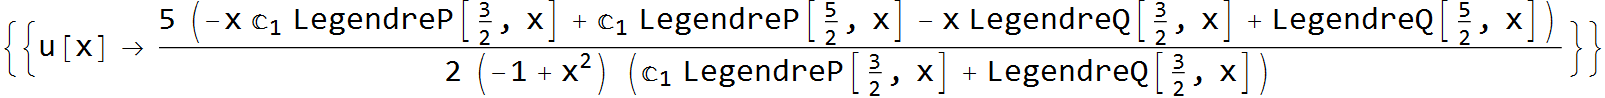

In [102]:
sol = DSolve[R==0, u[x], x] // Simplify

In [103]:
u[x]/.sol[[1]][[1]] // TeX

$$\frac{5 \left(c_1 (-x) P_{\frac{3}{2}}(x)+c_1 P_{\frac{5}{2}}(x)-x Q_{\frac{3}{2}}(x)+Q_{\frac{5}{2}}(x)\right)}{2 \left(x^2-1\right) \left(c_1 P_{\frac{3}{2}}(x)+Q_{\frac{3}{2}}(x)\right)}$$

#### Riccati方程式の解が1つ分かっている場合

$$
p=b-\frac{a'}{a}, \quad q=ac
$$

とおき, Riccati方程式

$$
u' + au^2 + bu + c = 0
\tag{$*$}
$$

の解 

$$
u = \frac{1}{a}\frac{f'}{f}
$$
が1つ分かっていると仮定する. ここで $f$ は $\psi$ に関する線形常微分方程式

$$
(\d^2+p\d+q)\psi = 0
\tag{$**$}
$$

の $0$ でない解である.  この線形常微分方程式の $f$ と一次独立な解 $g$ を

$$
\begin{aligned}
&
\phi = \int\frac{1}{f^2}e^{-\int p\,dx}\,dx =
\int\frac{a}{f^2}e^{-\int b\,dx}\,dx, 
\\ &
g = \phi f = f\int\frac{a}{f^2}e^{-\int b\,dx}\,dx
\end{aligned}
$$

によって構成できる. 

ゆえに, Riccati方程式 ($*$) のすべての解は, 線形常微分方程式 ($**$) の $0$ でないある解

$$
\psi = \alpha f + \beta g =
f\cdot\left(\alpha + \beta \phi \right) =
f\cdot\left(\alpha + \beta \int\frac{a}{f^2}e^{-\int b\,dx}\,dx \right)
$$

によって, 

$$
u = \frac{1}{a}\frac{\psi'}{\psi} = \frac{1}{a}(\log\psi)' =
\frac{1}{a}\frac{f'}{f} + 
\frac{\beta(1/f^2)e^{-\int b\,dx}}{\alpha + \beta \int(a/f^2)e^{-\int b\,dx}\,dx}
$$

と表わされる.

コンピューターによる以上の結果の確認.

In [104]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
p = b[x] - a'[x]/a[x];
p // TeX
q = a[x]c[x];
q // TeX
rulef = f''[x] -> -p f'[x] -q f[x];
rulef // TeX

Out[106]:
 
 
 $$b(x)-\frac{a'(x)}{a(x)}$$ 
 
 Out[108]:
 
 
 $$a(x) c(x)$$ 
 
 Out[110]:
 
 
 $$f''(x)\to -f'(x) \left(b(x)-\frac{a'(x)}{a(x)}\right)-a(x) c(x) f(x)$$

In [111]:
dphi = a[x]/f[x]^2 Exp[-Integrate[b[x], x]];
dphi // TeX
phi = Integrate[dphi, x];
phi // TeX
g = f[x] phi;
g // TeX

Out[112]:
 
 
 $$\frac{a(x) e^{-\int b(x) \, dx}}{f(x)^2}$$ 
 
 Out[114]:
 
 
 $$\int \frac{a(x) e^{-\int b(x) \, dx}}{f(x)^2} \, dx$$ 
 
 Out[116]:
 
 
 $$f(x) \int \frac{a(x) e^{-\int b(x) \, dx}}{f(x)^2} \, dx$$

In [117]:
L = Expand[(D[g,x,x] + p D[g,x] + q g)/phi]*phi;
L // TeX
L/.rulef // Simplify // TeX

Out[118]:
 
 
 $$\left(\int \frac{a(x) e^{-\int b(x) \, dx}}{f(x)^2} \, dx\right) \left(-\frac{a'(x) f'(x)}{a(x)}+a(x) c(x) f(x)+b(x) f'(x)+f''(x)\right)$$ 
 
 Out[119]:
 
 
 $$0$$

In [120]:
u = 1/a[x] D[alpha f[x]+beta g,x]/(alpha f[x]+beta g);
u // Simplify // Expand // TeX
R = Expand[Simplify[D[u,x] + a[x] u^2 + b[x]u + c[x]]a[x]f[x]];
R // TeX
R /.rulef // Simplify // TeX

Out[121]:
 
 
 $$\frac{\beta e^{-\int b(x) \, dx}}{f(x)^2 \left(\beta \int \frac{a(x) e^{-\int b(x) \, dx}}{f(x)^2} \, dx+\alpha \right)}+\frac{f'(x)}{a(x) f(x)}$$ 
 
 Out[123]:
 
 
 $$-\frac{a'(x) f'(x)}{a(x)}+a(x) c(x) f(x)+b(x) f'(x)+f''(x)$$ 
 
 Out[124]:
 
 
 $$0$$

$a=1$ の易しい場合のコンピューターによる以上の結果の確認. ただし, $b,c$ を $p,q$ と書く.

In [125]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
rulef = f''[x] -> -p[x]f'[x]-q[x]f[x];
rulef // TeX

$$f''(x)\to -p(x) f'(x)-f(x) q(x)$$

In [128]:
dphi = 1/f[x]^2 Exp[-Integrate[p[x], x]];
dphi // TeX
phi = Integrate[dphi, x];
phi // TeX
g = f[x] phi;
g // TeX

Out[129]:
 
 
 $$\frac{e^{-\int p(x) \, dx}}{f(x)^2}$$ 
 
 Out[131]:
 
 
 $$\int \frac{e^{-\int p(x) \, dx}}{f(x)^2} \, dx$$ 
 
 Out[133]:
 
 
 $$f(x) \int \frac{e^{-\int p(x) \, dx}}{f(x)^2} \, dx$$

In [134]:
L = D[g,x,x] + p[x] D[g,x] + q[x] g // Simplify;
L // TeX
L/.rulef // TeX

Out[135]:
 
 
 $$\left(\int \frac{e^{-\int p(x) \, dx}}{f(x)^2} \, dx\right) \left(f''(x)+p(x) f'(x)+f(x) q(x)\right)$$ 
 
 Out[136]:
 
 
 $$0$$

In [137]:
u = D[alpha f[x]+beta g,x]/(alpha f[x]+beta g);
u // Simplify // Expand // TeX
R = D[u,x] + u^2 + p[x]u + q[x] // Simplify;
R // TeX
R/.rulef // TeX

Out[138]:
 
 
 $$\frac{\beta e^{-\int p(x) \, dx}}{f(x)^2 \left(\alpha +\beta \int \frac{e^{-\int p(x) \, dx}}{f(x)^2} \, dx\right)}+\frac{f'(x)}{f(x)}$$ 
 
 Out[140]:
 
 
 $$\frac{f''(x)+p(x) f'(x)+f(x) q(x)}{f(x)}$$ 
 
 Out[141]:
 
 
 $$0$$

### Riccati方程式に定数解が存在する場合

$$
p=b-\frac{a'}{a}, \quad q=ac
$$

とおき, Riccati方程式

$$
u' + au^2 + bu + c = 0
\tag{$*$}
$$

が定数解 $\kappa$ を持つ場合を考える. そのとき, 

$$
\kappa^2 a + \kappa b + c = 0, \quad
\kappa=\frac{1}{a}\frac{f'}{f}, \quad
f=e^{\kappa\int a\,dx}
$$ 

でかつ, $f$ は $\psi$ に関する線形常微分方程式

$$
(\d^2+p\d+q)\psi = 0
\tag{$**$}
$$

の $0$ でない解になっている.  そのことは以下のようにして直接的にも確認できる:

$$
\begin{aligned}
&
f' = \kappa a f,
\\ &
f'' = \kappa af' + \kappa a'f = \kappa^2 a^2 f + \kappa a'f,
\\ &
\left(\d^2+p\d+q\right)f =
\kappa^2 a^2 f + \kappa a'f + \left(b - \frac{a'}{a}\right)\kappa a f + acf
\\ & \phantom{\left(\d^2+p\d+q\right)f} =
(\kappa^2 a + b\kappa + c)af = 0.
\end{aligned}
$$

線形常微分方程式 ($**$) の $f$ と一次独立な解 $g$ を

$$
\begin{aligned}
&
\phi' = \frac{1}{f^2}e^{-\int p\,dx} = 
\frac{a}{f^2}e^{-\int b\,dx} =
a e^{-\int(2\kappa a + b)\,dx},
\\ &
\phi = \int a e^{-\int(2\kappa a+b)\,dx}\,dx, 
\\ &
g = \phi f = f\int a e^{-\int(2\kappa a+b)\,dx}\,dx
\end{aligned}
$$

によって構成できる.

ゆえに, 定数解を持つ場合の Riccati方程式 ($*$) のすべての解は, 線形常微分方程式 ($**$) の $0$ でないある解

$$
\psi = \alpha f + \beta g =
f\cdot\left(\alpha + \beta \phi \right) =
f\cdot\left(\alpha + \beta \int a e^{-\int(2\kappa a+b)\,dx}\,dx \right)
$$

によって, 

$$
u = \frac{1}{a}\frac{\psi'}{\psi} = \frac{1}{a}(\log\psi)' =
\kappa + \frac{\beta\phi'/a}{\alpha+\beta\phi}=
\kappa + 
\frac{\beta e^{-\int(2\kappa a+b)\,dx}}
{\alpha + \beta \int a e^{-\int(2\kappa a+b)\,dx}\,dx}
$$

と表わされる.

In [142]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
rulec = c[x]->-kappa^2 a[x]-kappa b[x];
rulec // TeX

$$c(x)\to \kappa ^2 (-a(x))-\kappa b(x)$$

In [145]:
f[x_] := Exp[Integrate[kappa a[x], x]]
f[x] // TeX

$$e^{\kappa \int a(x) \, dx}$$

In [147]:
dphi = a[x]/f[x]^2 Exp[-Integrate[b[x], x]];
dphi // TeX

$$a(x) e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx}$$

In [149]:
phi = Integrate[dphi, x];
phi // TeX

$$\int a(x) e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx} \, dx$$

In [151]:
g = phi f[x];
g // TeX

$$e^{\kappa \int a(x) \, dx} \int a(x) e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx} \, dx$$

In [153]:
p = b[x] - a'[x]/a[x];
p // TeX
q = a[x]c[x];
q // TeX
L = D[g,x,x] + p D[g,x] + q g // Simplify;
L // TeX
L/.rulec // Simplify //TeX

Out[154]:
 
 
 $$b(x)-\frac{a'(x)}{a(x)}$$ 
 
 Out[156]:
 
 
 $$a(x) c(x)$$ 
 
 Out[158]:
 
 
 $$a(x) \left(\kappa ^2 a(x)+\kappa b(x)+c(x)\right) e^{\kappa \int a(x) \, dx} \int a(x) e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx} \, dx$$ 
 
 Out[159]:
 
 
 $$0$$

In [160]:
u = 1/a[x] D[alpha f[x]+ beta g,x]/(alpha f[x]+beta g);
u // Simplify // Collect[#, kappa]& // TeX
R = D[u,x] + a[x] u^2 + b[x] u + c[x] // Simplify;
R // TeX
R/.rulec // Simplify // TeX

Out[161]:
 
 
 $$\frac{\beta e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx}}{\beta \int a(x) e^{-2 \kappa \int a(x) \, dx-\int b(x) \, dx} \, dx+\alpha }+\kappa$$ 
 
 Out[163]:
 
 
 $$\kappa ^2 a(x)+\kappa b(x)+c(x)$$ 
 
 Out[164]:
 
 
 $$0$$

**例:** $a(x)=x+1$, $b(x)=-1$, $c(x)=-x$ の場合の次のRiccati方程式を考える:

$$
u'+(x+1) u^2-u-x = 0.
$$

これは $\kappa=1$ を解に持つ. $\kappa=1=f'/((x+1)f)$ を満たす $f$ として

$$
f = e^{(x+1)^2/2}
$$

が取れ, $p=b-a'/a=-1-1/(x+1)=-(x+2)/(x+1)$, $q=ac=-x(x+1)$ なので, $f$ は $\psi$ に関する線形常微分方程式

$$
\left(\d^2 - \frac{x+2}{x+1}\d - x(x+1)\right)\psi = 0
$$

の解であり, $f$ と一次独立なもう1つの解は, $a\kappa a+b=2a+b=2x+1$, $\int(2x+1)\,dx=(x+1/2)^2$, x+1=(2x+1)/2+1/2 なので

$$
\begin{aligned}
\phi' &= a e^{-\int(2\kappa a+b)\,dx} = (x+1) e^{-(x+1/2)^2},
\\
\phi &= \int (x+1) e^{-(x+1/2)^2}\,dx =
\frac{1}{2}\left(-e^{-(x+1/2)^2} + \int e^{-(x+1/2)^2}\,dx\right)
\\
g &= f \phi
e^{\int\kappa a\,dx} \int a e^{-\int(2\kappa a+b)\,dx}\,dx
\\ &=
e^{(x+1)^2/2} \int (x+1) e^{-(x+1/2)^2}\,dx
\\ &=
e^{(x+1)^2/2}\frac{1}{2}\left(-e^{-(x+1/2)^2} + \int e^{-(x+1/2)^2}\,dx\right)
\end{aligned}
$$

と取れる. ゆえにRiccati方程式の解は

$$
u = 1 + \frac
{\beta e^{-(x+1/2)^2}}
{\alpha + \beta\frac{1}{2}\left(-e^{-(x+1/2)^2} + \int e^{-(x+1/2)^2}\,dx\right)}
$$

と書ける.

以下はコンピューターによる上の例の確認

In [165]:
Clear[a,b,c,f,g,p,q,u,w,x,alpha,beta,dphi,phi,psi,L,R]
dphi = (x+1)Exp[-(x+1/2)^2];
dphi // TeX
phi = (1/2)(-Exp[-(x+1/2)^2] + Integrate[Exp[-(x+1/2)^2], x]);
phi // TeX
D[phi,x] - dphi // Simplify // TeX

Out[167]:
 
 
 $$e^{-\left(x+\frac{1}{2}\right)^2} (x+1)$$ 
 
 Out[169]:
 
 
 $$\frac{1}{2} \left(\frac{1}{2} \sqrt{\pi } \text{erf}\left(x+\frac{1}{2}\right)-e^{-\left(x+\frac{1}{2}\right)^2}\right)$$ 
 
 Out[170]:
 
 
 $$0$$

In [171]:
D[Erf[x],x] // TeX
D[Sqrt[Pi]/2 Erf[x+1/2], x] // TeX

Out[171]:
 
 
 $$\frac{2 e^{-x^2}}{\sqrt{\pi }}$$ 
 
 Out[172]:
 
 
 $$e^{-\left(x+\frac{1}{2}\right)^2}$$

In [173]:
f = Exp[(x+1)^2/2];
f // TeX
D[f,x,x] - (x+2)/(x+1) D[f,x] - x(x+1)f // Simplify // TeX

g = phi f;
g // TeX
D[g,x,x] - (x+2)/(x+1) D[g,x] - x(x+1)g // Simplify // TeX

Out[174]:
 
 
 $$e^{\frac{1}{2} (x+1)^2}$$ 
 
 Out[175]:
 
 
 $$0$$ 
 
 Out[178]:
 
 
 $$\frac{1}{2} e^{\frac{1}{2} (x+1)^2} \left(\frac{1}{2} \sqrt{\pi } \text{erf}\left(x+\frac{1}{2}\right)-e^{-\left(x+\frac{1}{2}\right)^2}\right)$$ 
 
 Out[179]:
 
 
 $$0$$

In [180]:
u = 1 + beta Exp[-(x+1/2)^2]/(alpha + beta phi);
u // TeX
D[u,x] + (x+1)u^2 - u - x // Simplify // TeX

Out[181]:
 
 
 $$\frac{\beta e^{-\left(x+\frac{1}{2}\right)^2}}{\alpha +\frac{1}{2} \beta \left(\frac{1}{2} \sqrt{\pi } \text{erf}\left(x+\frac{1}{2}\right)-e^{-\left(x+\frac{1}{2}\right)^2}\right)}+1$$ 
 
 Out[182]:
 
 
 $$0$$

Wolfram言語の `DSolve` 函数による解.

In [183]:
Clear[a,f,p,q,u,alpha,beta,dphi,phi,psi,L,R]
R = u'[x] + (x+1) u[x]^2 - u[x] - x;
R // TeX
R/.{u'[x]->0, u[x]->1} // TeX

Out[185]:
 
 
 $$u'(x)+(x+1) u(x)^2-u(x)-x$$ 
 
 Out[186]:
 
 
 $$0$$


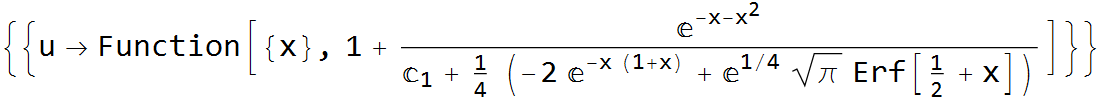

In [187]:
sol = DSolve[R==0, u, x]

In [188]:
(u/.sol[[1]][[1]])[x] // TeX
R/.sol[[1]] // Simplify // TeX

Out[188]:
 
 
 $$\frac{e^{-x^2-x}}{c_1+\frac{1}{4} \left(\sqrt[4]{e} \sqrt{\pi } \text{erf}\left(x+\frac{1}{2}\right)-2 e^{-x (x+1)}\right)}+1$$ 
 
 Out[189]:
 
 
 $$0$$

In [190]:
L = psi''[x]-(x+2)/(x+1) psi'[x] - x(x+1)psi[x];
L // TeX

$$\psi ''(x)-\frac{(x+2) \psi '(x)}{x+1}-x (x+1) \psi (x)$$


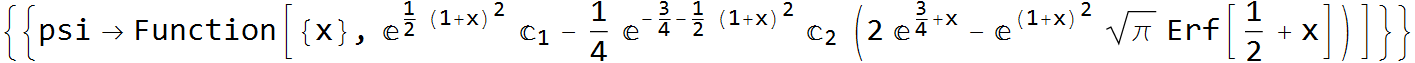

In [192]:
lsol = DSolve[L==0, psi, x]

In [193]:
(psi/.lsol[[1]][[1]])[x] // TeX
L/.lsol[[1]] // Simplify // TeX

Out[193]:
 
 
 $$c_1 e^{\frac{1}{2} (x+1)^2}-\frac{1}{4} c_2 e^{-\frac{1}{2} (x+1)^2-\frac{3}{4}} \left(2 e^{x+\frac{3}{4}}-\sqrt{\pi } e^{(x+1)^2} \text{erf}\left(x+\frac{1}{2}\right)\right)$$ 
 
 Out[194]:
 
 
 $$0$$